In [10]:
import pandas as pd

# Load both CSVs
df_li = pd.read_csv('Li_elements_2/all_props_new.csv')
df_zn = pd.read_csv('Zn_compounds/all_props_new.csv')

# Standardize column names
df_li = df_li.rename(columns={
    'results_per_li': 'results_per_atom',
    'LiSites': 'CationSites'
})

df_zn = df_zn.rename(columns={
    'results_per_zn': 'results_per_atom',
    'ZnSites': 'CationSites'
})

# Combine the DataFrames
df = pd.concat([df_li, df_zn], ignore_index=True)

print(df.shape)


(616, 18)


In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

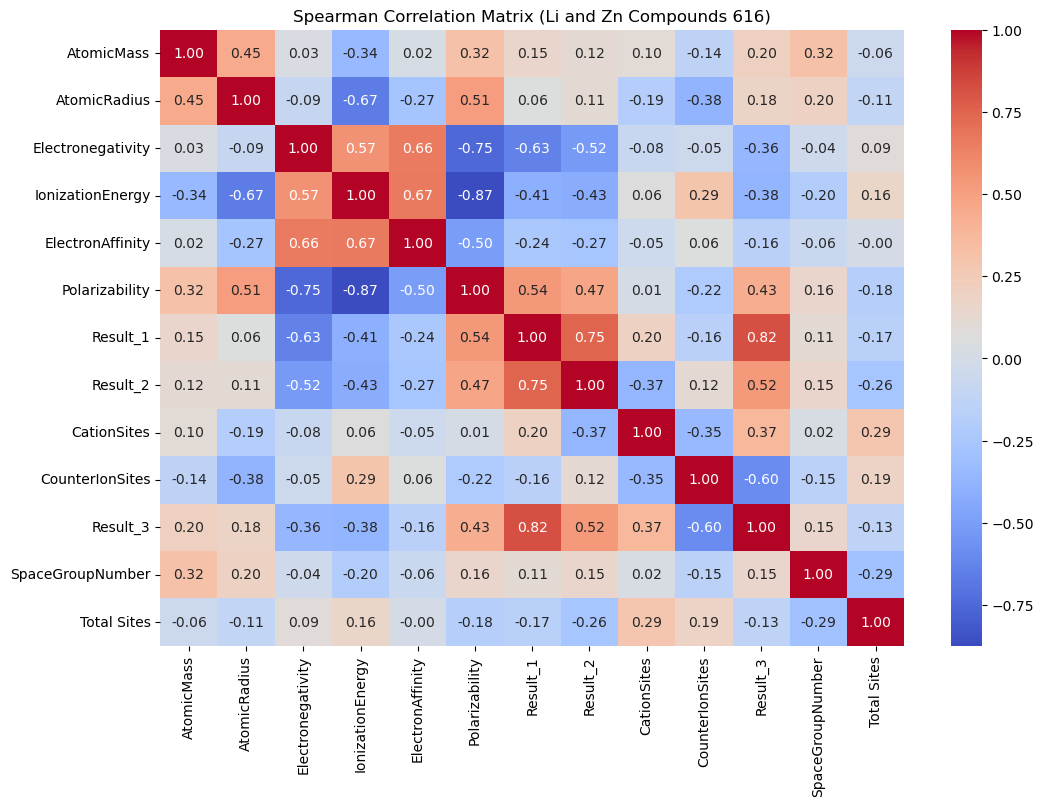

In [15]:
X = df.drop(columns=['Symbol','SpaceGroup','Result', 'Reduced Formula','res_per_volm_per_site'])

Y_total = df['results_per_total']
Y_li = df['results_per_atom']


X.rename(columns={'results_per_total': 'Result_1'}, inplace=True)
X.rename(columns={'results_per_atom': 'Result_2'}, inplace=True)
X.rename(columns={'results_per_counter_ion': 'Result_3'}, inplace=True)

#plot X 

plt.figure(figsize=(12, 8))
sns.heatmap(X.corr(method='spearman'), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Spearman Correlation Matrix (Li and Zn Compounds 616)')
plt.show()
